In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

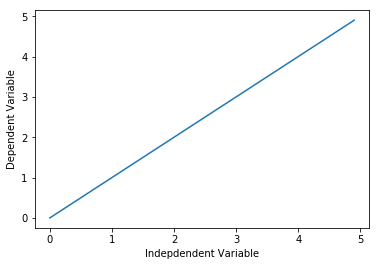

In [3]:
a=1
b=0

Y= a*X + b 

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [4]:
x_data = np.random.rand(100).astype(np.float32)
x_data

array([0.8345372 , 0.9195624 , 0.9636074 , 0.15657277, 0.4988282 ,
       0.9432966 , 0.07671034, 0.89852166, 0.64419657, 0.8901564 ,
       0.5090263 , 0.6165975 , 0.79981214, 0.3345973 , 0.18081225,
       0.45292887, 0.36934787, 0.8880275 , 0.7231264 , 0.5318511 ,
       0.87794906, 0.1627322 , 0.13919736, 0.5131512 , 0.9304176 ,
       0.46528083, 0.33744463, 0.7675902 , 0.07892641, 0.35564736,
       0.8996979 , 0.75483453, 0.126953  , 0.10775767, 0.17430976,
       0.5216192 , 0.6601587 , 0.31668356, 0.5011999 , 0.9784747 ,
       0.72828364, 0.46567073, 0.4080569 , 0.8540138 , 0.68354845,
       0.5814244 , 0.14597476, 0.3296168 , 0.95462984, 0.89765835,
       0.7096414 , 0.00509136, 0.3081814 , 0.19937195, 0.60579824,
       0.62082064, 0.3087329 , 0.5658246 , 0.18527506, 0.4643991 ,
       0.3158144 , 0.46047074, 0.46820474, 0.49310794, 0.8731368 ,
       0.54921436, 0.63106316, 0.04108281, 0.8698983 , 0.06071746,
       0.8675404 , 0.80092144, 0.8472254 , 0.769509  , 0.14497

In [5]:
y_data = x_data * 3 + 2

In [6]:
#add Gaussian noise
#loc - mean
#scale - std dev
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [8]:
y_data

array([4.39183111, 4.6239468 , 5.02540131, 2.50686708, 3.3350125 ,
       4.76558454, 2.30935081, 4.9277629 , 3.734493  , 4.46211379,
       3.64750497, 3.67832075, 4.18732216, 3.22304874, 2.41412266,
       3.25329594, 3.04049097, 4.54663185, 4.04275984, 3.81292042,
       4.60265728, 2.42043884, 2.4299533 , 3.54786584, 4.6576716 ,
       3.24609385, 3.24740286, 4.33960214, 2.25675346, 3.03849665,
       4.60692085, 4.21776623, 2.4224551 , 2.39687814, 2.26790363,
       3.8051181 , 4.0058439 , 3.05602582, 3.42981118, 5.07800456,
       4.24044865, 3.40446473, 3.21522782, 4.4434709 , 3.94089094,
       3.75801086, 2.48567227, 2.81185652, 4.84234128, 4.7546118 ,
       3.97582624, 1.85563685, 2.78677886, 2.81507442, 3.96680607,
       3.89453449, 2.88442383, 3.71399439, 2.42136573, 3.53398684,
       2.87120966, 3.3744827 , 3.38997694, 3.56319177, 4.6950536 ,
       3.7285091 , 3.89200993, 2.03784239, 4.60887029, 2.15712967,
       4.72451158, 4.51728136, 4.52193958, 4.14490895, 2.51063

In [9]:
#Random Initialization
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [10]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [12]:
optimizer = tf.train.GradientDescentOptimizer(0.5)

In [13]:
train = optimizer.minimize(loss)

In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [15]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [2.7585645, 3.0930943]
5 [2.5202806, 2.2712433]
10 [2.6524713, 2.1969817]
15 [2.7464845, 2.1417515]
20 [2.8141084, 2.1020327]
25 [2.862748, 2.0734644]
30 [2.8977327, 2.0529163]
35 [2.9228961, 2.0381367]
40 [2.9409955, 2.027506]
45 [2.9540136, 2.01986]
50 [2.9633768, 2.0143607]
55 [2.9701111, 2.010405]
60 [2.9749553, 2.0075598]
65 [2.9784393, 2.0055137]
70 [2.9809453, 2.0040417]
75 [2.9827478, 2.0029829]
80 [2.9840443, 2.0022216]
85 [2.9849768, 2.001674]
90 [2.9856474, 2.0012798]
95 [2.98613, 2.0009966]


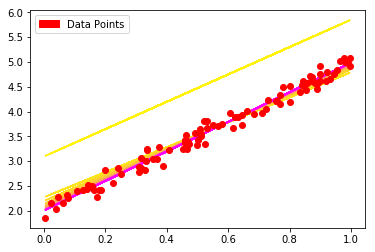

In [16]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()